# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Airline  Data

In [2]:
airline_data = pd.read_csv(r"C:\Users\kd67152\Desktop\Datasets\Invistico_Airline.csv")
airline_data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


# Replacing the NAN values with mean

In [3]:
airline_data.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [4]:
airline_data["Arrival Delay in Minutes"].fillna( value =airline_data["Arrival Delay in Minutes"].mean(), inplace = True)
airline_data.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

# Change the categorical values

In [5]:
object_cols = airline_data.select_dtypes(include=[np.object]).columns
for col in object_cols:
    vals = airline_data[col].unique()
    airline_data[col].replace(vals,np.arange(len(vals)),inplace=True)

C:\Users\kd67152\AppData\Local\Temp\ipykernel_27956\2318781784.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  object_cols = airline_data.select_dtypes(include=[np.object]).columns


# Taking dependent and independent variables

In [6]:
X = airline_data.drop(["satisfaction"],axis=1)
y = airline_data["satisfaction"]

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

# Implementation of model

In [8]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier()

In [9]:
score = model.score(X_test,y_test)
print("Accuracy score of RandomForestClassifier {}".format(score))

Accuracy score of RandomForestClassifier 0.9560620059542142


In [10]:
y_pred = model.predict(X_test)

In [11]:
f1Score = f1_score(y_test,y_pred)
print("F1_Score is RandomForestClassifier {}".format(f1Score))

F1_Score is RandomForestClassifier 0.9517447432211511


In [14]:
model.score(X_train,y_train)

0.9999890008359364

C:\Users\kd67152\AppData\Local\Temp\ipykernel_27956\288722038.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

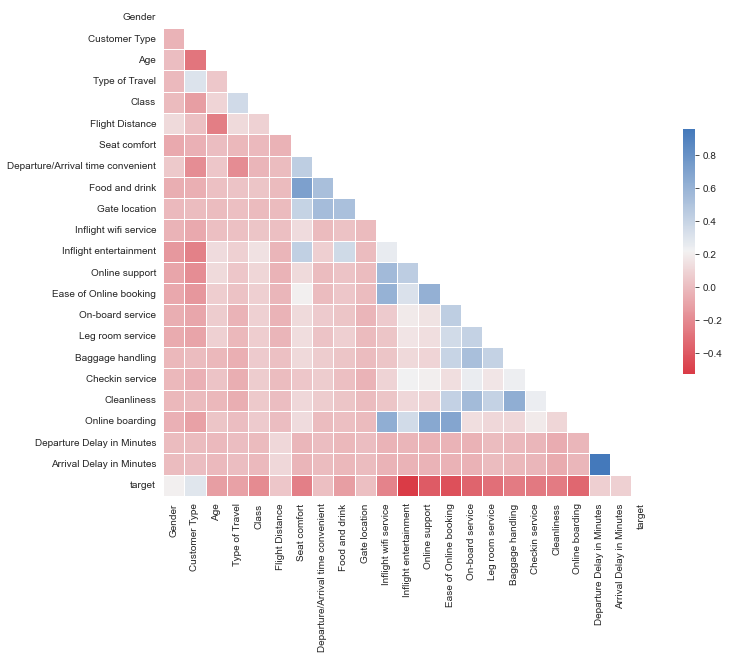

In [13]:
data = airline_data.iloc[:, 1: 23]
data["target"] = airline_data["satisfaction"]
# use the pands .corr() function to compute pairwise correlations for the dataframe
corr = data.corr()
# visualise the data with seaborn
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)